<a href="https://colab.research.google.com/github/vu-topics-in-big-data-2023/Team05/blob/main/spark_jobs_mark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"

In [8]:
#install spark. we are using the one that uses hadoop as the underlying scheduler.
!wget -q https://downloads.apache.org/spark/spark-3.2.4/spark-3.2.4-bin-hadoop3.2.tgz
!tar xf  spark-3.2.4-bin-hadoop3.2.tgz
!ls -l

#Provides findspark.init() to make pyspark importable as a regular library.
os.environ["SPARK_HOME"] = "spark-3.2.4-bin-hadoop3.2"
os.environ['PYSPARK_SUBMIT_ARGS'] = '--packages org.apache.spark:spark-streaming-kafka-0-8_2.11:2.4.7 pyspark-shell'

total 294144
drwx------  6 root root      4096 Apr 30 19:15 drive
drwxr-xr-x  1 root root      4096 Apr 27 13:35 sample_data
drwxr-xr-x 13 1000 1000      4096 Apr  9 21:17 spark-3.2.4-bin-hadoop3.2
-rw-r--r--  1 root root 301183180 Apr  9 21:35 spark-3.2.4-bin-hadoop3.2.tgz


In [9]:
!pip install -q findspark pyspark
import findspark
findspark.init()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#!cat /content/drive/MyDrive/Big-Data-Final/nfd_incidents_xd_seg.parquet

In [10]:
drive.flush_and_unmount()
print('All changes made in this colab session should now be visible in Drive.')

All changes made in this colab session should now be visible in Drive.


## Average response time + variance by SegID

In [13]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("read_parquet_file").getOrCreate()

df = spark.read.parquet("/content/drive/MyDrive/Big-Data-Final/nfd_incidents_xd_seg.parquet")


In [14]:
print(df.show(5))

+--------------------+-----------+------------+-------------+--------------------+--------------------+-----------------+-----------+--------------+--------------------+-----------+------------------+-------------+
|         ID_Original|   latitude|   longitude|emdCardNumber|            time_utc|          time_local|response_time_sec|day_of_week|weekend_or_not|            geometry|Incident_ID|       Dist_to_Seg|      XDSegID|
+--------------------+-----------+------------+-------------+--------------------+--------------------+-----------------+-----------+--------------+--------------------+-----------+------------------+-------------+
|ObjectId(59d3a819...|36.03722849|-86.78324314|         29B5|2017-01-01 07:59:...|2017-01-01 01:59:...|            268.0|          6|             1|POINT (-86.783243...|         10|13.550370382347305|1.524393684E9|
|ObjectId(59d3a819...|36.03741402|-86.78657189|        29D2P| 2017-01-01 08:30:55| 2017-01-01 02:30:55|            512.0|          6|       

In [ ]:
#HERE WE HAVE TO CREATE THE CENSUS TRACT PER ROW

In [ ]:
from pyspark.sql.functions import avg

# Read the input file as a Spark dataframe
# df = spark.read.format("csv").option("header", "true").load("input.csv")

# Group the dataframe by XDSegID and compute the average response time
result_df = df.groupBy("XDSegID").agg(avg("response_time_sec").alias("AvgResponseTime"))

# Write the result to a CSV file
result_df.write.format("csv").option("header", "true").mode("overwrite").save("output.csv")

In [ ]:
result_df.show()

+-------------+------------------+
|      XDSegID|   AvgResponseTime|
+-------------+------------------+
|1.524470198E9|             349.2|
| 1.52446673E9|             404.0|
| 4.41552617E8| 297.6666666666667|
|  4.5042845E8|             582.5|
|1.524609417E9|             407.6|
|1.524475884E9|             337.0|
| 4.29334846E8|            490.25|
|1.524322123E9|             154.5|
| 4.49620825E8|             553.0|
|1.524554221E9|             410.0|
| 4.49621869E8|             798.0|
| 4.49629818E8|             148.5|
| 1.56811863E8|             405.0|
|1.524576615E9|             496.0|
| 4.29334039E8|             449.6|
| 1.56551371E8|             256.0|
| 1.56121138E8|             310.8|
|1.524303919E9|           242.625|
|1.524378121E9|476.14285714285717|
|1.524474299E9|             449.5|
+-------------+------------------+
only showing top 20 rows



In [ ]:
from pyspark.sql.functions import col, variance

# group by XDSegID and calculate variance of ResponseTime
df_agg = df.groupBy("XDSegID").agg(variance(col("response_time_sec")).alias("Variance"))

# show the results
df_agg.show()

+-------------+------------------+
|      XDSegID|          Variance|
+-------------+------------------+
|1.524470198E9|           51834.2|
| 1.52446673E9| 68509.06666666667|
| 4.41552617E8| 4837.333333333333|
|  4.5042845E8|          180600.5|
|1.524609417E9|           23415.3|
|1.524475884E9|              null|
| 4.29334846E8|         124896.25|
|1.524322123E9|             364.5|
| 4.49620825E8|           18050.0|
|1.524554221E9|              null|
| 4.49621869E8|              null|
| 4.49629818E8|           42340.5|
| 1.56811863E8|              null|
|1.524576615E9|              null|
| 4.29334039E8|11660.300000000001|
| 1.56551371E8|            2584.0|
| 1.56121138E8|           20254.7|
|1.524303919E9|14160.916666666664|
|1.524378121E9|18207.476190476194|
|1.524474299E9|           19012.5|
+-------------+------------------+
only showing top 20 rows



## Weather correlation on the the incidents and response time distribution

In [ ]:
from pyspark.sql.functions import min, max, date_format

min_local_time = df.select(min(date_format('time_local', 'yyyy-MM-dd HH:mm:ss'))).collect()[0][0]
max_local_time = df.select(max(date_format('time_local', 'yyyy-MM-dd HH:mm:ss'))).collect()[0][0]

print("Minimum local time: ", min_local_time)
print("Maximum local time: ", max_local_time)


Minimum local time:  2017-01-01 01:59:29
Maximum local time:  2021-03-02 07:45:57


In [ ]:
weather_df = spark.read.parquet("/content/drive/MyDrive/Big-Data-Final/weather_tn.parquet/year=2017/month=1/part-00039-0c8142a9-ffb0-4186-8d5f-060d4d2afe7d.c000.snappy.parquet")

In [ ]:
weather_df.show(5)

+------------+-------------+-----------+-------------------+----+--------+-------------------+---+----------+--------+----------+---------+-----+-------+-----+----+---+-------+--------+---+---+----+---+-------------+----+------+------+-----------+----+-----+---------------+-----------------------+------------------------+-----------+----------+
|  station_id|start_date_st|end_date_st|    timestamp_local|  rh|wind_spd|      timestamp_utc|pod|       slp|app_temp|elev_angle|solar_rad| pres|h_angle|dewpt|snow| uv|azimuth|wind_dir|ghi|dhi| vis|dni|     datetime|temp|precip|clouds|         ts|icon| code|    description|gps_coordinate_latitude|gps_coordinate_longitude| spatial_id|      days|
+------------+-------------+-----------+-------------------+----+--------+-------------------+---+----------+--------+----------+---------+-----+-------+-----+----+---+-------+--------+---+---+----+---+-------------+----+------+------+-----------+----+-----+---------------+-----------------------+--------

In [ ]:
df.show(5)

+--------------------+-----------+------------+-------------+--------------------+----------+-----------------+-----------+--------------+--------------------+-----------+------------------+-------------+-------------------+-------------------+----------+
|         ID_Original|   latitude|   longitude|emdCardNumber|            time_utc|time_local|response_time_sec|day_of_week|weekend_or_not|            geometry|Incident_ID|       Dist_to_Seg|      XDSegID|     time_local_str|    timestamp_local|      date|
+--------------------+-----------+------------+-------------+--------------------+----------+-----------------+-----------+--------------+--------------------+-----------+------------------+-------------+-------------------+-------------------+----------+
|ObjectId(59d3a819...|36.03722849|-86.78324314|         29B5|2017-01-01 07:59:...|1483235969|            268.0|          6|             1|POINT (-86.783243...|         10|13.550370382347305|1.524393684E9|2017-01-01 01:59:29|2017-01-

In [ ]:
import requests
import json
from pyspark.sql.functions import to_timestamp, unix_timestamp, from_unixtime

# define your OpenWeatherMap API key
api_key = "7efb75d5c7c543ecbecd97c26e4fa62e"

# define the endpoint URL for the API call
endpoint_url = "https://api.openweathermap.org/data/2.5/weather"

df = df.withColumn('time_local_str', from_unixtime(df['time_local'], 'yyyy-MM-dd HH:mm:ss'))
df = df.withColumn("timestamp_local", from_unixtime(df.time_local)) \
       .withColumn("date", date_format("timestamp_local", "yyyy-MM-dd"))

# define the columns you want to join on
join_columns = ["time_local", "latitude", "longitude"]



df.show(5)


+--------------------+-----------+------------+-------------+--------------------+----------+-----------------+-----------+--------------+--------------------+-----------+------------------+-------------+-------------------+-------------------+----------+
|         ID_Original|   latitude|   longitude|emdCardNumber|            time_utc|time_local|response_time_sec|day_of_week|weekend_or_not|            geometry|Incident_ID|       Dist_to_Seg|      XDSegID|     time_local_str|    timestamp_local|      date|
+--------------------+-----------+------------+-------------+--------------------+----------+-----------------+-----------+--------------+--------------------+-----------+------------------+-------------+-------------------+-------------------+----------+
|ObjectId(59d3a819...|36.03722849|-86.78324314|         29B5|2017-01-01 07:59:...|1483235969|            268.0|          6|             1|POINT (-86.783243...|         10|13.550370382347305|1.524393684E9|2017-01-01 01:59:29|2017-01-

In [ ]:
import requests
import json
from pyspark.sql.functions import from_unixtime

# function to query the OpenWeatherMap API for weather conditions at the specified time and location
def get_weather_data(row):
    params = {
        "lat": row["latitude"],
        "lon": row["longitude"],
        "dt": row["time_local"],
        "appid": api_key,
    }
    response = requests.get(endpoint_url, params=params)
    weather_data = json.loads(response.text)
    print(response.text)
    if response is None:
      return None
    else:
      return (row["time_local"], row["latitude"], row["longitude"], weather_data.get("weather")[0].get("main"))

# create a new DataFrame with weather data joined to the original DataFrame
join_columns = ["time_local", "latitude", "longitude"]


import time

batch_size = 100
batch_count = df.count() // batch_size + 1

for i in range(batch_count):
    start_index = i * batch_size
    end_index = (i + 1) * batch_size

    # create batch dataframe
    batch_df = df.limit(batch_size).toPandas()[start_index:end_index]
    
    # process batch and join weather data
    batch_weather_df = batch_df.apply(get_weather_data, axis=1)
    batch_weather_df.columns = ["time_local", "latitude", "longitude", "weather"]
    joined_df = batch_df.join(batch_weather_df.set_index(["time_local", "latitude", "longitude"]), on=["time_local", "latitude", "longitude"])
    
    # do further processing on the joined_df
    print("next one")
    time.sleep(60) # wait for a minute between each batch to avoid exceeding the rate limit


{"cod":429, "message": "Your account is temporary blocked due to exceeding of requests limitation of your subscription type. Please choose the proper subscription https://openweathermap.org/price"}


/content/spark-3.2.4-bin-hadoop3.2/python/pyspark/sql/pandas/conversion.py:194: FutureWarning: Passing unit-less datetime64 dtype to .astype is deprecated and will raise in a future version. Pass 'datetime64[ns]' instead
  series = series.astype(t, copy=False)


TypeError: ignored

Py4JJavaError: ignored

Trying Again with Local Stuff

In [4]:
import os
import pandas as pd

# specify the root directory where parquet files are located
root_dir = '/content/drive/MyDrive/Big-Data-Final/weather_tn.parquet'

# create an empty list to store the dataframes
dfs = []

# recursively search through the directory tree and find all parquet files
for subdir, dirs, files in os.walk(root_dir):
    for file in files:
        if file.endswith('.parquet'):
            # read in the parquet file and append it to the list of dataframes
            filepath = os.path.join(subdir, file)
            df = pd.read_parquet(filepath)

            # group the DataFrame by the timestamp column
            grouped = df.groupby('timestamp_local')

            # filter the groups to only keep those with 5 or more rows
            filtered = grouped.filter(lambda x: len(x) >= 5)

            # sample 5 rows from each group
            sampled = filtered.groupby('timestamp_local').apply(lambda x: x.sample(n=5))

            # reset the index of the resulting DataFrame
            result = sampled.reset_index(drop=True)

            dfs.append(result)

# concatenate all of the dataframes into a single dataframe
merged_df = pd.concat(dfs, ignore_index=True)


In [6]:
merged_df.columns

Index(['station_id', 'start_date_st', 'end_date_st', 'timestamp_local', 'rh',
       'wind_spd', 'timestamp_utc', 'pod', 'slp', 'app_temp', 'elev_angle',
       'solar_rad', 'pres', 'h_angle', 'dewpt', 'snow', 'uv', 'azimuth',
       'wind_dir', 'ghi', 'dhi', 'vis', 'dni', 'datetime', 'temp', 'precip',
       'clouds', 'ts', 'icon', 'code', 'description',
       'gps_coordinate_latitude', 'gps_coordinate_longitude', 'spatial_id',
       'days'],
      dtype='object')

In [15]:
pandas_df = df.toPandas()
pandas_df


/content/spark-3.2.4-bin-hadoop3.2/python/pyspark/sql/pandas/conversion.py:194: FutureWarning: Passing unit-less datetime64 dtype to .astype is deprecated and will raise in a future version. Pass 'datetime64[ns]' instead
  series = series.astype(t, copy=False)
/content/spark-3.2.4-bin-hadoop3.2/python/pyspark/sql/pandas/conversion.py:194: FutureWarning: Passing unit-less datetime64 dtype to .astype is deprecated and will raise in a future version. Pass 'datetime64[ns]' instead
  series = series.astype(t, copy=False)


,ID_Original,latitude,longitude,emdCardNumber,time_utc,time_local,response_time_sec,day_of_week,weekend_or_not,geometry,Incident_ID,Dist_to_Seg,XDSegID
0,ObjectId(59d3a81908f47311c891f8e2),36.037228,-86.783243,29B5,2017-01-01 07:59:29.507,2017-01-01 01:59:29.507,268.0,6,1,POINT (-86.78324314 36.03722849),10,13.550370,1.524394e+09
1,ObjectId(59d3a81908f47311c891f8e6),36.037414,-86.786572,29D2P,2017-01-01 08:30:55.000,2017-01-01 02:30:55.000,512.0,6,1,POINT (-86.78657189 36.03741402),11,3.663952,1.524356e+09
2,ObjectId(59d3a81a08f47311c891f8ef),36.217663,-86.808699,29D1H,2017-01-01 09:35:10.000,2017-01-01 03:35:10.000,271.0,6,1,POINT (-86.80869908 36.21766267),12,NaN,NaN
3,ObjectId(59d3a81a08f47311c891f8f9),36.057790,-86.739728,29D8V,2017-01-01 10:29:31.867,2017-01-01 04:29:31.867,366.0,6,1,POINT (-86.73972836 36.05779026),13,NaN,NaN
4,ObjectId(59d3a81a08f47311c891f904),36.039221,-86.602785,29A2V,2017-01-01 11:09:13.000,2017-01-01 05:09:13.000,447.0,6,1,POINT (-86.60278517 36.03922079),14,3.171782,4.496208e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29760,ObjectId(603dab3d95fad0761f05c089),36.264172,-86.727176,29A2V,2021-03-02 03:00:41.943,2021-03-01 21:00:41.943,401.0,0,0,POINT (-86.72717565 36.26417165),29770,5.601240,4.496178e+08
29761,ObjectId(603dab3f95fad0761f05c08a),36.045373,-86.658851,29B1,2021-03-02 03:01:57.740,2021-03-01 21:01:57.740,985.0,0,0,POINT (-86.65885054 36.04537322),29771,1.961266,1.524314e+09
29762,ObjectId(603daec495fad0761f05c08d),36.116022,-86.782203,29B5,2021-03-02 03:16:37.113,2021-03-01 21:16:37.113,NaN,0,0,POINT (-86.78220264 36.11602207),29772,3.013125,1.524340e+09
29763,ObjectId(603e2d5795fad0761f05c0f2),36.159411,-86.822013,29B1,2021-03-02 12:15:58.047,2021-03-02 06:15:58.047,791.0,1,0,POINT (-86.82201339 36.15941116),29773,3.195641,1.524408e+09


In [16]:
# convert the timestamp column to a datetime object
pandas_df['time_local'] = pd.to_datetime(pandas_df['time_local'])
merged_df['timestamp_local'] = pd.to_datetime(merged_df['timestamp_local'])

# add a new column to both dataframes with the hour part of the timestamp
pandas_df['hour'] = pandas_df['time_local'].dt.hour
merged_df['hour'] = merged_df['timestamp_local'].dt.hour

pandas_df['date'] = pandas_df['time_local'].dt.date
merged_df['date'] = merged_df['timestamp_local'].dt.date

In [17]:
pandas_df

,ID_Original,latitude,longitude,emdCardNumber,time_utc,time_local,response_time_sec,day_of_week,weekend_or_not,geometry,Incident_ID,Dist_to_Seg,XDSegID,hour,date
0,ObjectId(59d3a81908f47311c891f8e2),36.037228,-86.783243,29B5,2017-01-01 07:59:29.507,2017-01-01 01:59:29.507,268.0,6,1,POINT (-86.78324314 36.03722849),10,13.550370,1.524394e+09,1,2017-01-01
1,ObjectId(59d3a81908f47311c891f8e6),36.037414,-86.786572,29D2P,2017-01-01 08:30:55.000,2017-01-01 02:30:55.000,512.0,6,1,POINT (-86.78657189 36.03741402),11,3.663952,1.524356e+09,2,2017-01-01
2,ObjectId(59d3a81a08f47311c891f8ef),36.217663,-86.808699,29D1H,2017-01-01 09:35:10.000,2017-01-01 03:35:10.000,271.0,6,1,POINT (-86.80869908 36.21766267),12,NaN,NaN,3,2017-01-01
3,ObjectId(59d3a81a08f47311c891f8f9),36.057790,-86.739728,29D8V,2017-01-01 10:29:31.867,2017-01-01 04:29:31.867,366.0,6,1,POINT (-86.73972836 36.05779026),13,NaN,NaN,4,2017-01-01
4,ObjectId(59d3a81a08f47311c891f904),36.039221,-86.602785,29A2V,2017-01-01 11:09:13.000,2017-01-01 05:09:13.000,447.0,6,1,POINT (-86.60278517 36.03922079),14,3.171782,4.496208e+08,5,2017-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29760,ObjectId(603dab3d95fad0761f05c089),36.264172,-86.727176,29A2V,2021-03-02 03:00:41.943,2021-03-01 21:00:41.943,401.0,0,0,POINT (-86.72717565 36.26417165),29770,5.601240,4.496178e+08,21,2021-03-01
29761,ObjectId(603dab3f95fad0761f05c08a),36.045373,-86.658851,29B1,2021-03-02 03:01:57.740,2021-03-01 21:01:57.740,985.0,0,0,POINT (-86.65885054 36.04537322),29771,1.961266,1.524314e+09,21,2021-03-01
29762,ObjectId(603daec495fad0761f05c08d),36.116022,-86.782203,29B5,2021-03-02 03:16:37.113,2021-03-01 21:16:37.113,NaN,0,0,POINT (-86.78220264 36.11602207),29772,3.013125,1.524340e+09,21,2021-03-01
29763,ObjectId(603e2d5795fad0761f05c0f2),36.159411,-86.822013,29B1,2021-03-02 12:15:58.047,2021-03-02 06:15:58.047,791.0,1,0,POINT (-86.82201339 36.15941116),29773,3.195641,1.524408e+09,6,2021-03-02


In [18]:

# merge the dataframes on the hour and any other columns you need
merged = pd.merge(pandas_df, merged_df, on=['hour', 'date'], how='inner')

# drop the 'hour' column from the merged dataframe
merged = merged.drop(columns=['hour', 'date'])


#final_df = pd.merge(pandas_df, merged_df, left_on='time_local', right_on='timestamp_local')


In [20]:
merged.columns

Index(['ID_Original', 'latitude', 'longitude', 'emdCardNumber', 'time_utc',
       'time_local', 'response_time_sec', 'day_of_week', 'weekend_or_not',
       'geometry', 'Incident_ID', 'Dist_to_Seg', 'XDSegID', 'station_id',
       'start_date_st', 'end_date_st', 'timestamp_local', 'rh', 'wind_spd',
       'timestamp_utc', 'pod', 'slp', 'app_temp', 'elev_angle', 'solar_rad',
       'pres', 'h_angle', 'dewpt', 'snow', 'uv', 'azimuth', 'wind_dir', 'ghi',
       'dhi', 'vis', 'dni', 'datetime', 'temp', 'precip', 'clouds', 'ts',
       'icon', 'code', 'description', 'gps_coordinate_latitude',
       'gps_coordinate_longitude', 'spatial_id', 'days'],
      dtype='object')

Pick the closest weather station

In [23]:
#print(merged.iloc[2])
mask = merged['Incident_ID'] == 10

# apply the mask to the DataFrame to select the rows that match the condition
selected_rows = merged[mask]

# print the selected rows
print(selected_rows)

                          ID_Original   latitude  longitude emdCardNumber  \
0  ObjectId(59d3a81908f47311c891f8e2)  36.037228 -86.783243          29B5   
1  ObjectId(59d3a81908f47311c891f8e2)  36.037228 -86.783243          29B5   
2  ObjectId(59d3a81908f47311c891f8e2)  36.037228 -86.783243          29B5   
3  ObjectId(59d3a81908f47311c891f8e2)  36.037228 -86.783243          29B5   
4  ObjectId(59d3a81908f47311c891f8e2)  36.037228 -86.783243          29B5   

                 time_utc              time_local  response_time_sec  \
0 2017-01-01 07:59:29.507 2017-01-01 01:59:29.507              268.0   
1 2017-01-01 07:59:29.507 2017-01-01 01:59:29.507              268.0   
2 2017-01-01 07:59:29.507 2017-01-01 01:59:29.507              268.0   
3 2017-01-01 07:59:29.507 2017-01-01 01:59:29.507              268.0   
4 2017-01-01 07:59:29.507 2017-01-01 01:59:29.507              268.0   

   day_of_week  weekend_or_not                          geometry  ...  precip  \
0            6         

In [24]:
from geopy.distance import distance

# assume 'df' is the DataFrame of accidents with weather data and 'lat_col' and 'lon_col' 
# are the names of the columns that contain the latitude and longitude coordinates
# assume 'incident_id_col' is the name of the column that contains the incident ID

# define a custom function that takes a group of rows and selects the closest weather station based on the distance to the accident location
def select_closest_weather_station(group):
    # extract the incident location coordinates
    incident_loc = (group.iloc[0]['latitude'], group.iloc[0]['longitude'])
    
    # calculate the distance to each weather station and select the closest one
    closest_station = None
    closest_distance = float('inf')
    for index, row in group.iterrows():
        station_loc = (row['gps_coordinate_latitude'], row['gps_coordinate_longitude'])
        station_distance = distance(incident_loc, station_loc).km
        if station_distance < closest_distance:
            closest_station = index
            closest_distance = station_distance
    
    # return the row with the closest weather station
    return group.loc[closest_station]

# apply the custom function to the grouped data using the groupby method and the apply method
selected_rows = merged.groupby('Incident_ID').apply(select_closest_weather_station)

# print the selected rows
print(selected_rows)

                                    ID_Original   latitude  longitude  \
Incident_ID                                                             
10           ObjectId(59d3a81908f47311c891f8e2)  36.037228 -86.783243   
11           ObjectId(59d3a81908f47311c891f8e6)  36.037414 -86.786572   
12           ObjectId(59d3a81a08f47311c891f8ef)  36.217663 -86.808699   
13           ObjectId(59d3a81a08f47311c891f8f9)  36.057790 -86.739728   
14           ObjectId(59d3a81a08f47311c891f904)  36.039221 -86.602785   
...                                         ...        ...        ...   
29770        ObjectId(603dab3d95fad0761f05c089)  36.264172 -86.727176   
29771        ObjectId(603dab3f95fad0761f05c08a)  36.045373 -86.658851   
29772        ObjectId(603daec495fad0761f05c08d)  36.116022 -86.782203   
29773        ObjectId(603e2d5795fad0761f05c0f2)  36.159411 -86.822013   
29774        ObjectId(603e427795fad0761f05c102)  36.051939 -86.670056   

            emdCardNumber                time_utc 

In [26]:
# create a new dataframe with the selected rows and reset the index
selected_df = selected_rows.reset_index(drop=True)

# print the selected dataframe
print(selected_df.iloc[0])

ID_Original                 ObjectId(59d3a81908f47311c891f8e2)
latitude                                             36.037228
longitude                                           -86.783243
emdCardNumber                                             29B5
time_utc                            2017-01-01 07:59:29.507000
time_local                          2017-01-01 01:59:29.507000
response_time_sec                                        268.0
day_of_week                                                  6
weekend_or_not                                               1
geometry                      POINT (-86.78324314 36.03722849)
Incident_ID                                                 10
Dist_to_Seg                                           13.55037
XDSegID                                           1524393684.0
station_id                                        723280-03894
start_date_st                                             None
end_date_st                                            

In [34]:
#Save so we don't have to reload data 
# drive.mount('/content/drive')
path = '/content/drive/MyDrive/Big-Data-Final/weather_incident.csv'
with open(path, 'w', encoding = 'utf-8-sig') as f:
  selected_df.to_csv(f)

In [4]:
import pandas as pd

# Read CSV file
selected_df = pd.read_csv('/content/drive/MyDrive/Big-Data-Final/weather_incident.csv')

# Display data
print(selected_df.head())

   Unnamed: 0                         ID_Original   latitude  longitude  \
0           0  ObjectId(59d3a81908f47311c891f8e2)  36.037228 -86.783243   
1           1  ObjectId(59d3a81908f47311c891f8e6)  36.037414 -86.786572   
2           2  ObjectId(59d3a81a08f47311c891f8ef)  36.217663 -86.808699   
3           3  ObjectId(59d3a81a08f47311c891f8f9)  36.057790 -86.739728   
4           4  ObjectId(59d3a81a08f47311c891f904)  36.039221 -86.602785   

  emdCardNumber                 time_utc               time_local  \
0          29B5  2017-01-01 07:59:29.507  2017-01-01 01:59:29.507   
1         29D2P  2017-01-01 08:30:55.000  2017-01-01 02:30:55.000   
2         29D1H  2017-01-01 09:35:10.000  2017-01-01 03:35:10.000   
3         29D8V  2017-01-01 10:29:31.867  2017-01-01 04:29:31.867   
4         29A2V  2017-01-01 11:09:13.000  2017-01-01 05:09:13.000   

   response_time_sec  day_of_week  weekend_or_not  ... precip  clouds  \
0              268.0            6               1  ...    0.0

#plot by categorical weather condtions and their response time/incident frequency


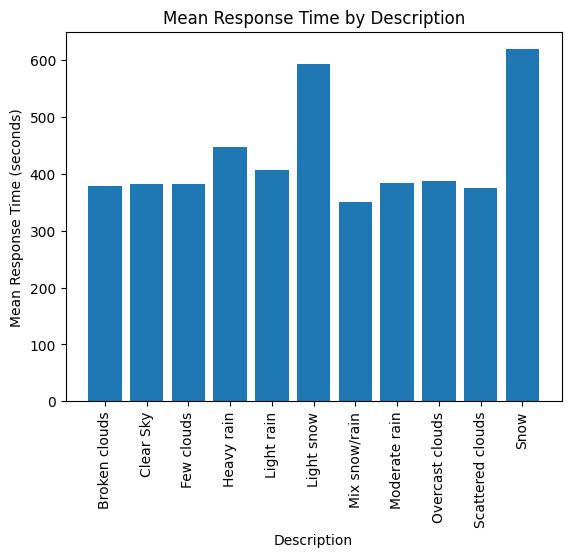

In [38]:
import matplotlib.pyplot as plt

# assume the response time data is stored in a column called 'response_time'

# group the DataFrame by the 'description' column and compute the mean response time for each category
mean_response_times = selected_df.groupby('description')['response_time_sec'].mean()

# create a bar chart using matplotlib
plt.bar(mean_response_times.index, mean_response_times.values)

# set the chart title and axis labels
plt.title('Mean Response Time by Description')
plt.xlabel('Description')
plt.ylabel('Mean Response Time (seconds)')

plt.xticks(rotation=90)

# display the chart
plt.show()


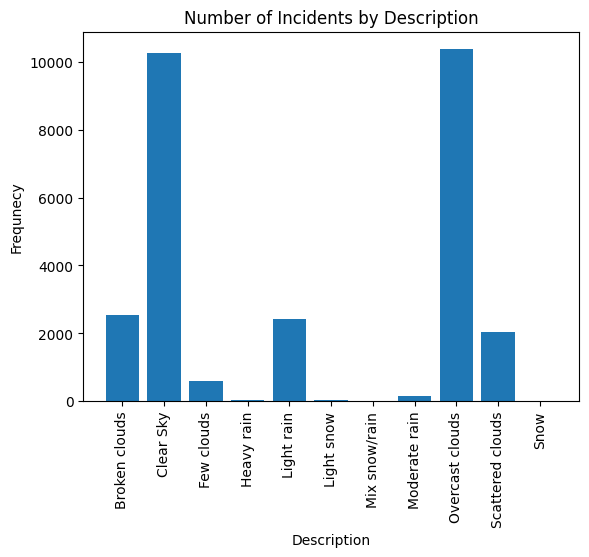

In [68]:
import matplotlib.pyplot as plt

# assume the response time data is stored in a column called 'response_time'

# group the DataFrame by the 'description' column and compute the mean response time for each category
mean_response_times = selected_df.groupby('description')['response_time_sec'].count()

# create a bar chart using matplotlib
plt.bar(mean_response_times.index, mean_response_times.values)

# set the chart title and axis labels
plt.title('Number of Incidents by Description')
plt.xlabel('Description')
plt.ylabel('Frequnecy')

plt.xticks(rotation=90)

# display the chart
plt.show()

#USE THE RATIO FROM THE WEATHER DF TO GET THE EXPECTED COUNT

In [ ]:
import plotly.graph_objs as go
import pandas as pd

# define the color scale
colorscale = [
    [0, 'green'],  # lower values in blue
    [1, 'red']    # higher values in red
]

no_outliers = selected_df[selected_df['response_time_sec'] <= 2000]

# calculate marker size based on response time
marker_size = no_outliers['response_time_sec'].apply(lambda x: 10 if x > 1500 else 5)

# create a scatter plot using Plotly
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=no_outliers['wind_spd'],
    y=no_outliers['temp'],
    mode='markers',
    marker=dict(
        color=no_outliers['response_time_sec'],
        colorscale=colorscale,
        cmin=no_outliers['response_time_sec'].min(),
        cmax=no_outliers['response_time_sec'].max(),
        colorbar=dict(title='Mean Response Time'),
        size=marker_size,  # set marker size based on response time
        sizemode='diameter'  # use diameter to set size
    )
))

# set the plot title and axis labels
fig.update_layout(title='Scatter Plot Example',
                  xaxis_title='Precipitation',
                  yaxis_title='Wind Speed')

# show the plot
fig.show()

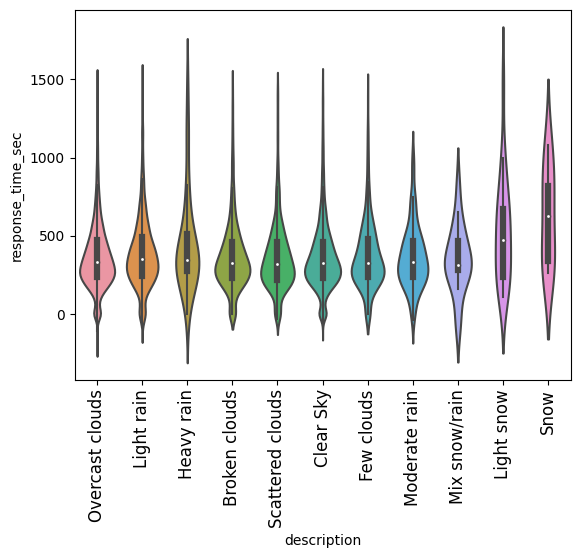

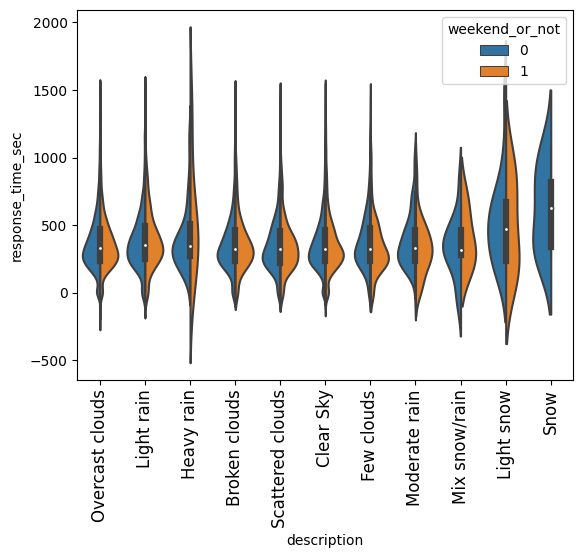

In [65]:
import seaborn as sns
import pandas as pd
import numpy as np

no_outliers = selected_df[selected_df['response_time_sec'] <= 1500]

sns.violinplot(x="description", y="response_time_sec",  data=no_outliers)
plt.xticks(rotation=90, fontsize=12)

plt.show()

# Create a violin plot with hue parameter to separate data by category
sns.violinplot(x="description", y="response_time_sec", hue="weekend_or_not", split=True, data=no_outliers)


# set x-axis label rotation and font size
plt.xticks(rotation=90, fontsize=12)


# Show the plot
plt.show()




array([[<Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'time_utc'}>,
        <Axes: title={'center': 'time_local'}>,
        <Axes: title={'center': 'response_time_sec'}>,
        <Axes: title={'center': 'day_of_week'}>],
       [<Axes: title={'center': 'weekend_or_not'}>,
        <Axes: title={'center': 'Incident_ID'}>,
        <Axes: title={'center': 'Dist_to_Seg'}>,
        <Axes: title={'center': 'XDSegID'}>,
        <Axes: title={'center': 'timestamp_local'}>,
        <Axes: title={'center': 'rh'}>],
       [<Axes: title={'center': 'wind_spd'}>,
        <Axes: title={'center': 'timestamp_utc'}>,
        <Axes: title={'center': 'slp'}>,
        <Axes: title={'center': 'app_temp'}>,
        <Axes: title={'center': 'elev_angle'}>,
        <Axes: title={'center': 'solar_rad'}>],
       [<Axes: title={'center': 'pres'}>,
        <Axes: title={'center': 'h_angle'}>,
        <Axes: title={'center': 'dewpt'}>,
        <

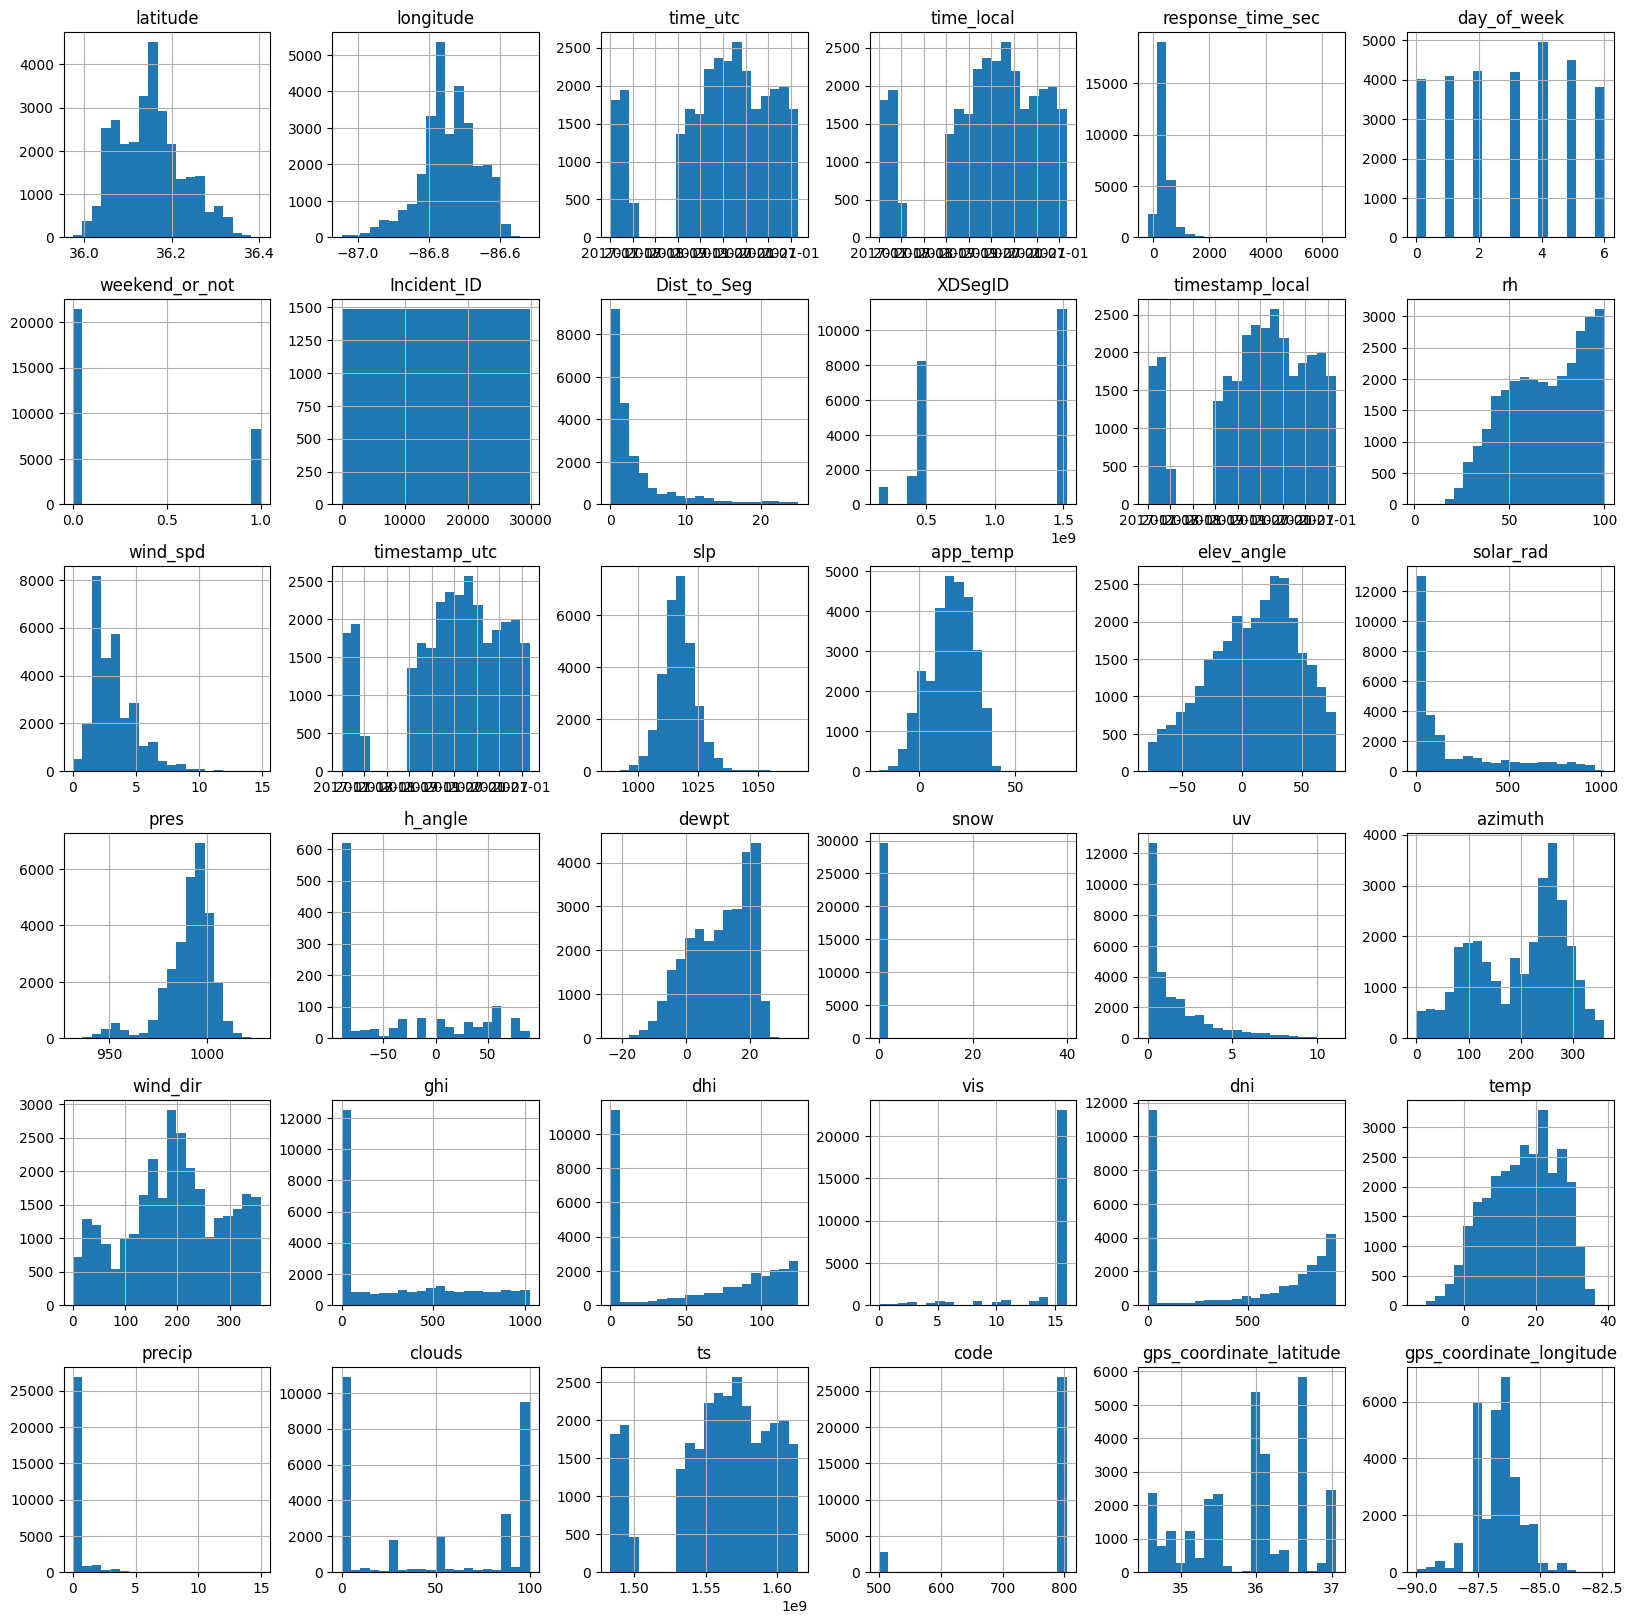

In [77]:

# plot the distributions of all numerical variables
selected_df.hist(bins=20, figsize=(20,20))


# machine learning on the numerical attributes like precipataion etc for biggest contributors


In [5]:
print(selected_df.dtypes)

Unnamed: 0                    int64
ID_Original                  object
latitude                    float64
longitude                   float64
emdCardNumber                object
time_utc                     object
time_local                   object
response_time_sec           float64
day_of_week                   int64
weekend_or_not                int64
geometry                     object
Incident_ID                   int64
Dist_to_Seg                 float64
XDSegID                     float64
station_id                   object
start_date_st               float64
end_date_st                 float64
timestamp_local              object
rh                          float64
wind_spd                    float64
timestamp_utc                object
pod                          object
slp                         float64
app_temp                    float64
elev_angle                  float64
solar_rad                   float64
pres                        float64
h_angle                     

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.impute import SimpleImputer


# create an imputer object with mean strategy
imputer = SimpleImputer(strategy='mean')

# fit and transform the imputer on your dataset
selected_df['response_time_sec'] = imputer.fit_transform(selected_df[['response_time_sec']])

selected_df['time_local'] = pd.to_datetime(selected_df['time_local'])

#have an hour of day column from datetime
selected_df['hour_of_day'] = selected_df['time_local'].dt.hour

#categorical for description
selected_df['description_cat'] = pd.factorize(selected_df['description'])[0]

# select the features for the model
features = ["latitude", "longitude", "hour_of_day", "day_of_week", "weekend_or_not", "rh", "wind_spd", "slp", "app_temp", "elev_angle", "solar_rad", "pres", "h_angle", "dewpt", "snow", "uv", "azimuth", "wind_dir", "ghi", "dhi", "vis", "dni", "temp", "precip", "clouds", "ts", "code", "description_cat"]

In [8]:
# calculate mean of each column
col_means = selected_df.mean()

# replace NaNs with column means
mean_imputed_df = selected_df.fillna(col_means)

<ipython-input-8-b8dbeec80058>:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  col_means = selected_df.mean()
<ipython-input-8-b8dbeec80058>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  col_means = selected_df.mean()


In [101]:

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(mean_imputed_df[features], mean_imputed_df['response_time_sec'], test_size=0.2)

# define the random forest regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# train the model on the training data
model.fit(X_train, y_train)

# make predictions on the test data
y_pred = model.predict(X_test)

# calculate the mean absolute error of the predictions
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae:.2f} seconds')



Mean Absolute Error: 157.60 seconds


In [102]:
from sklearn.metrics import mean_absolute_error, r2_score

# calculate accuracy
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)


R-squared: 0.04874209706549881


In [103]:
# get feature importances
importances = model.feature_importances_

# Assuming that your data is stored in a dataframe called `df`, you can define `X` and `y` as follows:
X = selected_df[features]  # drop the target variable from the input features
y = selected_df['response_time_sec']  # define the target variable as `y`

# create a dataframe to store feature importances
importances_df = pd.DataFrame({'feature': X.columns, 'importance': importances})

# sort the dataframe by importance in descending order
importances_df = importances_df.sort_values('importance', ascending=False)

# print the sorted dataframe
print(importances_df)

            feature  importance
0          latitude    0.152820
1         longitude    0.146559
25               ts    0.076024
11             pres    0.056875
16          azimuth    0.056352
7               slp    0.053002
17         wind_dir    0.049127
6          wind_spd    0.043316
13            dewpt    0.041218
5                rh    0.040977
9        elev_angle    0.035640
8          app_temp    0.032640
22             temp    0.032090
10        solar_rad    0.023103
2       hour_of_day    0.021175
15               uv    0.020090
3       day_of_week    0.019843
20              vis    0.016303
21              dni    0.015213
19              dhi    0.011952
23           precip    0.010540
24           clouds    0.010499
18              ghi    0.010395
26             code    0.008347
27  description_cat    0.008258
12          h_angle    0.003423
4    weekend_or_not    0.003107
14             snow    0.001112


In [10]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(mean_imputed_df[features], mean_imputed_df['response_time_sec'], test_size=0.2)

# Initialize Gradient Boosting Regressor
gbr = GradientBoostingRegressor()

# Train the model
gbr.fit(X_train, y_train)

# Predict on the test set
y_pred = gbr.predict(X_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 48304.4314912074


In [105]:
from sklearn.metrics import mean_absolute_error, r2_score

# calculate accuracy
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)


R-squared: 0.09684107738909631


In [11]:
# get feature importances
importances = gbr.feature_importances_

# Assuming that your data is stored in a dataframe called `df`, you can define `X` and `y` as follows:
X = selected_df[features]  # drop the target variable from the input features
y = selected_df['response_time_sec']  # define the target variable as `y`

# create a dataframe to store feature importances
importances_df = pd.DataFrame({'feature': X.columns, 'importance': importances})

# sort the dataframe by importance in descending order
importances_df = importances_df.sort_values('importance', ascending=False)

# print the sorted dataframe
print(importances_df)

            feature  importance
1         longitude    0.346320
0          latitude    0.330001
25               ts    0.135497
7               slp    0.026001
8          app_temp    0.023557
22             temp    0.021173
16          azimuth    0.018286
11             pres    0.014949
2       hour_of_day    0.014142
9        elev_angle    0.011446
6          wind_spd    0.011261
13            dewpt    0.009710
10        solar_rad    0.007142
5                rh    0.004555
3       day_of_week    0.004129
23           precip    0.003465
19              dhi    0.002928
17         wind_dir    0.002917
18              ghi    0.002824
24           clouds    0.001893
14             snow    0.001850
20              vis    0.001641
21              dni    0.001604
26             code    0.001580
15               uv    0.000650
12          h_angle    0.000480
4    weekend_or_not    0.000000
27  description_cat    0.000000


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

# define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.5, 0.7, 1],
    'max_features': [None, 'sqrt', 'log2']
}

# instantiate the model
gbr = GradientBoostingRegressor(random_state=42)

# instantiate the GridSearchCV object
grid_search = GridSearchCV(gbr, param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')

# fit the model on training data
grid_search.fit(X_train, y_train)

# print the best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)

# predict response time on test data using the best model
y_pred = grid_search.predict(X_test)

# evaluate the model
print("R-squared score:", r2_score(y_test, y_pred))
print("Mean absolute error:", mean_absolute_error(y_test, y_pred))
